# Classificação de cogumelos: comestível ou venenoso?

O objetivo desse projeto é, dada uma base de dados com informações sobre cogumelos, prever se eles são comestíveis ou venenosos. 

A base de dados utilizada nesse projeto pode ser encontrada aqui: <https://www.kaggle.com/datasets/vishalpnaik/mushroom-classification-edible-or-poisonous/data>

### Carregando o dataset

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [61]:
data = pd.read_csv("mushroom.csv")

In [62]:
data.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [63]:
data.shape

(61069, 21)

### Análise exploratória dos dados

In [64]:
# Visualizando as primeiras 5 linhas
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


**Descrição das features**:

> **class**: Indica se o cogumelo é venenoso ou não. Quando é 'p' é venenoso, quando é 'e' é comestível.

>**cap-diameter**: Diâmetro do chapéu do cogumelo em cm.

>**cap-shape**:
Forma do chapéu do cogumelo, sendo: sino (b) cônico (c) convexo (x) plano (f) afundado (s) esférico (p) outros (o) para quaisquer outras formas não listadas explicitamente.

>**cap-surface**:
Textura da superfície do chapéu do cogumelo, onde: fibrosa (i) ranhuras (g) escamosa (y) lisa (s) brilhante (h) coriácea (l) sedosa (k) pegajosa (t) enrugada (w) carnuda (e)

>**cap-color**:
A cor do chapéu do cogumelo, com várias opções, como marrom, lustre, cinza, verde, rosa, roxo, vermelho, branco, amarelo, azul, laranja e preto (nominal).

>**does-bruise-or-bleed**:
Indica se o cogumelo se machuca ou sangra quando ferido (nominal).

>**gill-attachment**:
Como as brânquias estão presas ao caule, onde: adnato (a) anexado (x) decorrente (d) livre (e) sinuado (s) poros (p) nenhum (f) desconhecido (?)

>**gill-spacing**:
Espaçamento entre as brânquias, onde: próximo (c) distante (d) nenhum (f)

>**gill-color**:
Cor das brânquias, onde: veja cap-color (e none=f)

>**stem-height**:
Altura do caule do cogumelo em cm.

>**stem-width**:
Largura do caule do cogumelo em mm.

>**stem-root**:
>Estrutura da raiz do caule, sendo: bulbosa (b) inchada (s) em forma de clube (c) em forma de taça (u) igual (e) rizomorfa (z) enraizada (r)

>**stem-surface**:
Textura da superfície do caule do cogumelo, onde: ver cap-surface (e nenhuma=f)

>**stem-color**:
Cor do véu, onde: ver cap-color (e nenhuma=f)

>**veil-type**:
Tipo de véu que cobre as brânquias, sendo: parcial (p) universal (u)

>**veil-color**:
Cor do véu, onde: ver cap-color (e nenhuma=f)

>**has-ring**:
Presença de um anel no cogumelo, sendo: anel (t) e nenhum (f)

>**ring-type**:
Tipo de anel presente, em que: teia de aranha (c) evanescente (e) alargado (r) ranhurado (g) grande (l) pendente (p) revestimento (s) zona (z) escamoso (y) móvel (m) nenhum (f) desconhecido (?)

>**spore-print-color**:
Cor da impressão do esporo do cogumelo, onde: ver cap-color

>**habitat**:
Ambiente onde o cogumelo é encontrado, onde: gramíneas (g) folhas (l) prados (m) caminhos (p) charnecas (h) urbano (u) lixo (w) bosques (d)

>**season**:
Estação em que o cogumelo é comumente observado, onde: primavera (s) verão (u) outono (a) inverno (w)

In [65]:
# Colunas do dataframe
data.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [66]:
# Dimensões do dataframe
print(f"Linhas: {data.shape[0]}\nColunas: {data.shape[1]}")

Linhas: 61069
Colunas: 21


In [67]:
data.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [68]:
# Contagem de valores não nulos em cada coluna
data.count()

class                   61069
cap-diameter            61069
cap-shape               61069
cap-surface             46949
cap-color               61069
does-bruise-or-bleed    61069
gill-attachment         51185
gill-spacing            36006
gill-color              61069
stem-height             61069
stem-width              61069
stem-root                9531
stem-surface            22945
stem-color              61069
veil-type                3177
veil-color               7413
has-ring                61069
ring-type               58598
spore-print-color        6354
habitat                 61069
season                  61069
dtype: int64

In [69]:
data.nunique().sort_values()

veil-type                  1
class                      2
has-ring                   2
does-bruise-or-bleed       2
gill-spacing               3
season                     4
stem-root                  5
veil-color                 6
gill-attachment            7
cap-shape                  7
spore-print-color          7
habitat                    8
stem-surface               8
ring-type                  8
cap-surface               11
gill-color                12
cap-color                 12
stem-color                13
stem-height             2226
cap-diameter            2571
stem-width              4630
dtype: int64

In [70]:
# Vendo a proporção de cada classe no dataframe para checar se não estão desbalanceadas.
data['class'].value_counts(normalize=True)

class
p    0.554913
e    0.445087
Name: proportion, dtype: float64

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [72]:
# Transformando o 'e' em 0 em 'p' em 1.
data["class"] = data['class'].map({"e":1, "p":0})

In [73]:
# Separando as variáveis numéricas 

numerical_features = data[['cap-diameter','stem-height', 'stem-width']]

In [74]:
print(numerical_features)

       cap-diameter  stem-height  stem-width
0             15.26        16.95       17.09
1             16.60        17.99       18.19
2             14.07        17.80       17.74
3             14.17        15.77       15.98
4             14.64        16.53       17.20
...             ...          ...         ...
61064          1.18         3.93        6.22
61065          1.27         3.18        5.43
61066          1.27         3.86        6.37
61067          1.24         3.56        5.44
61068          1.17         3.25        5.45

[61069 rows x 3 columns]


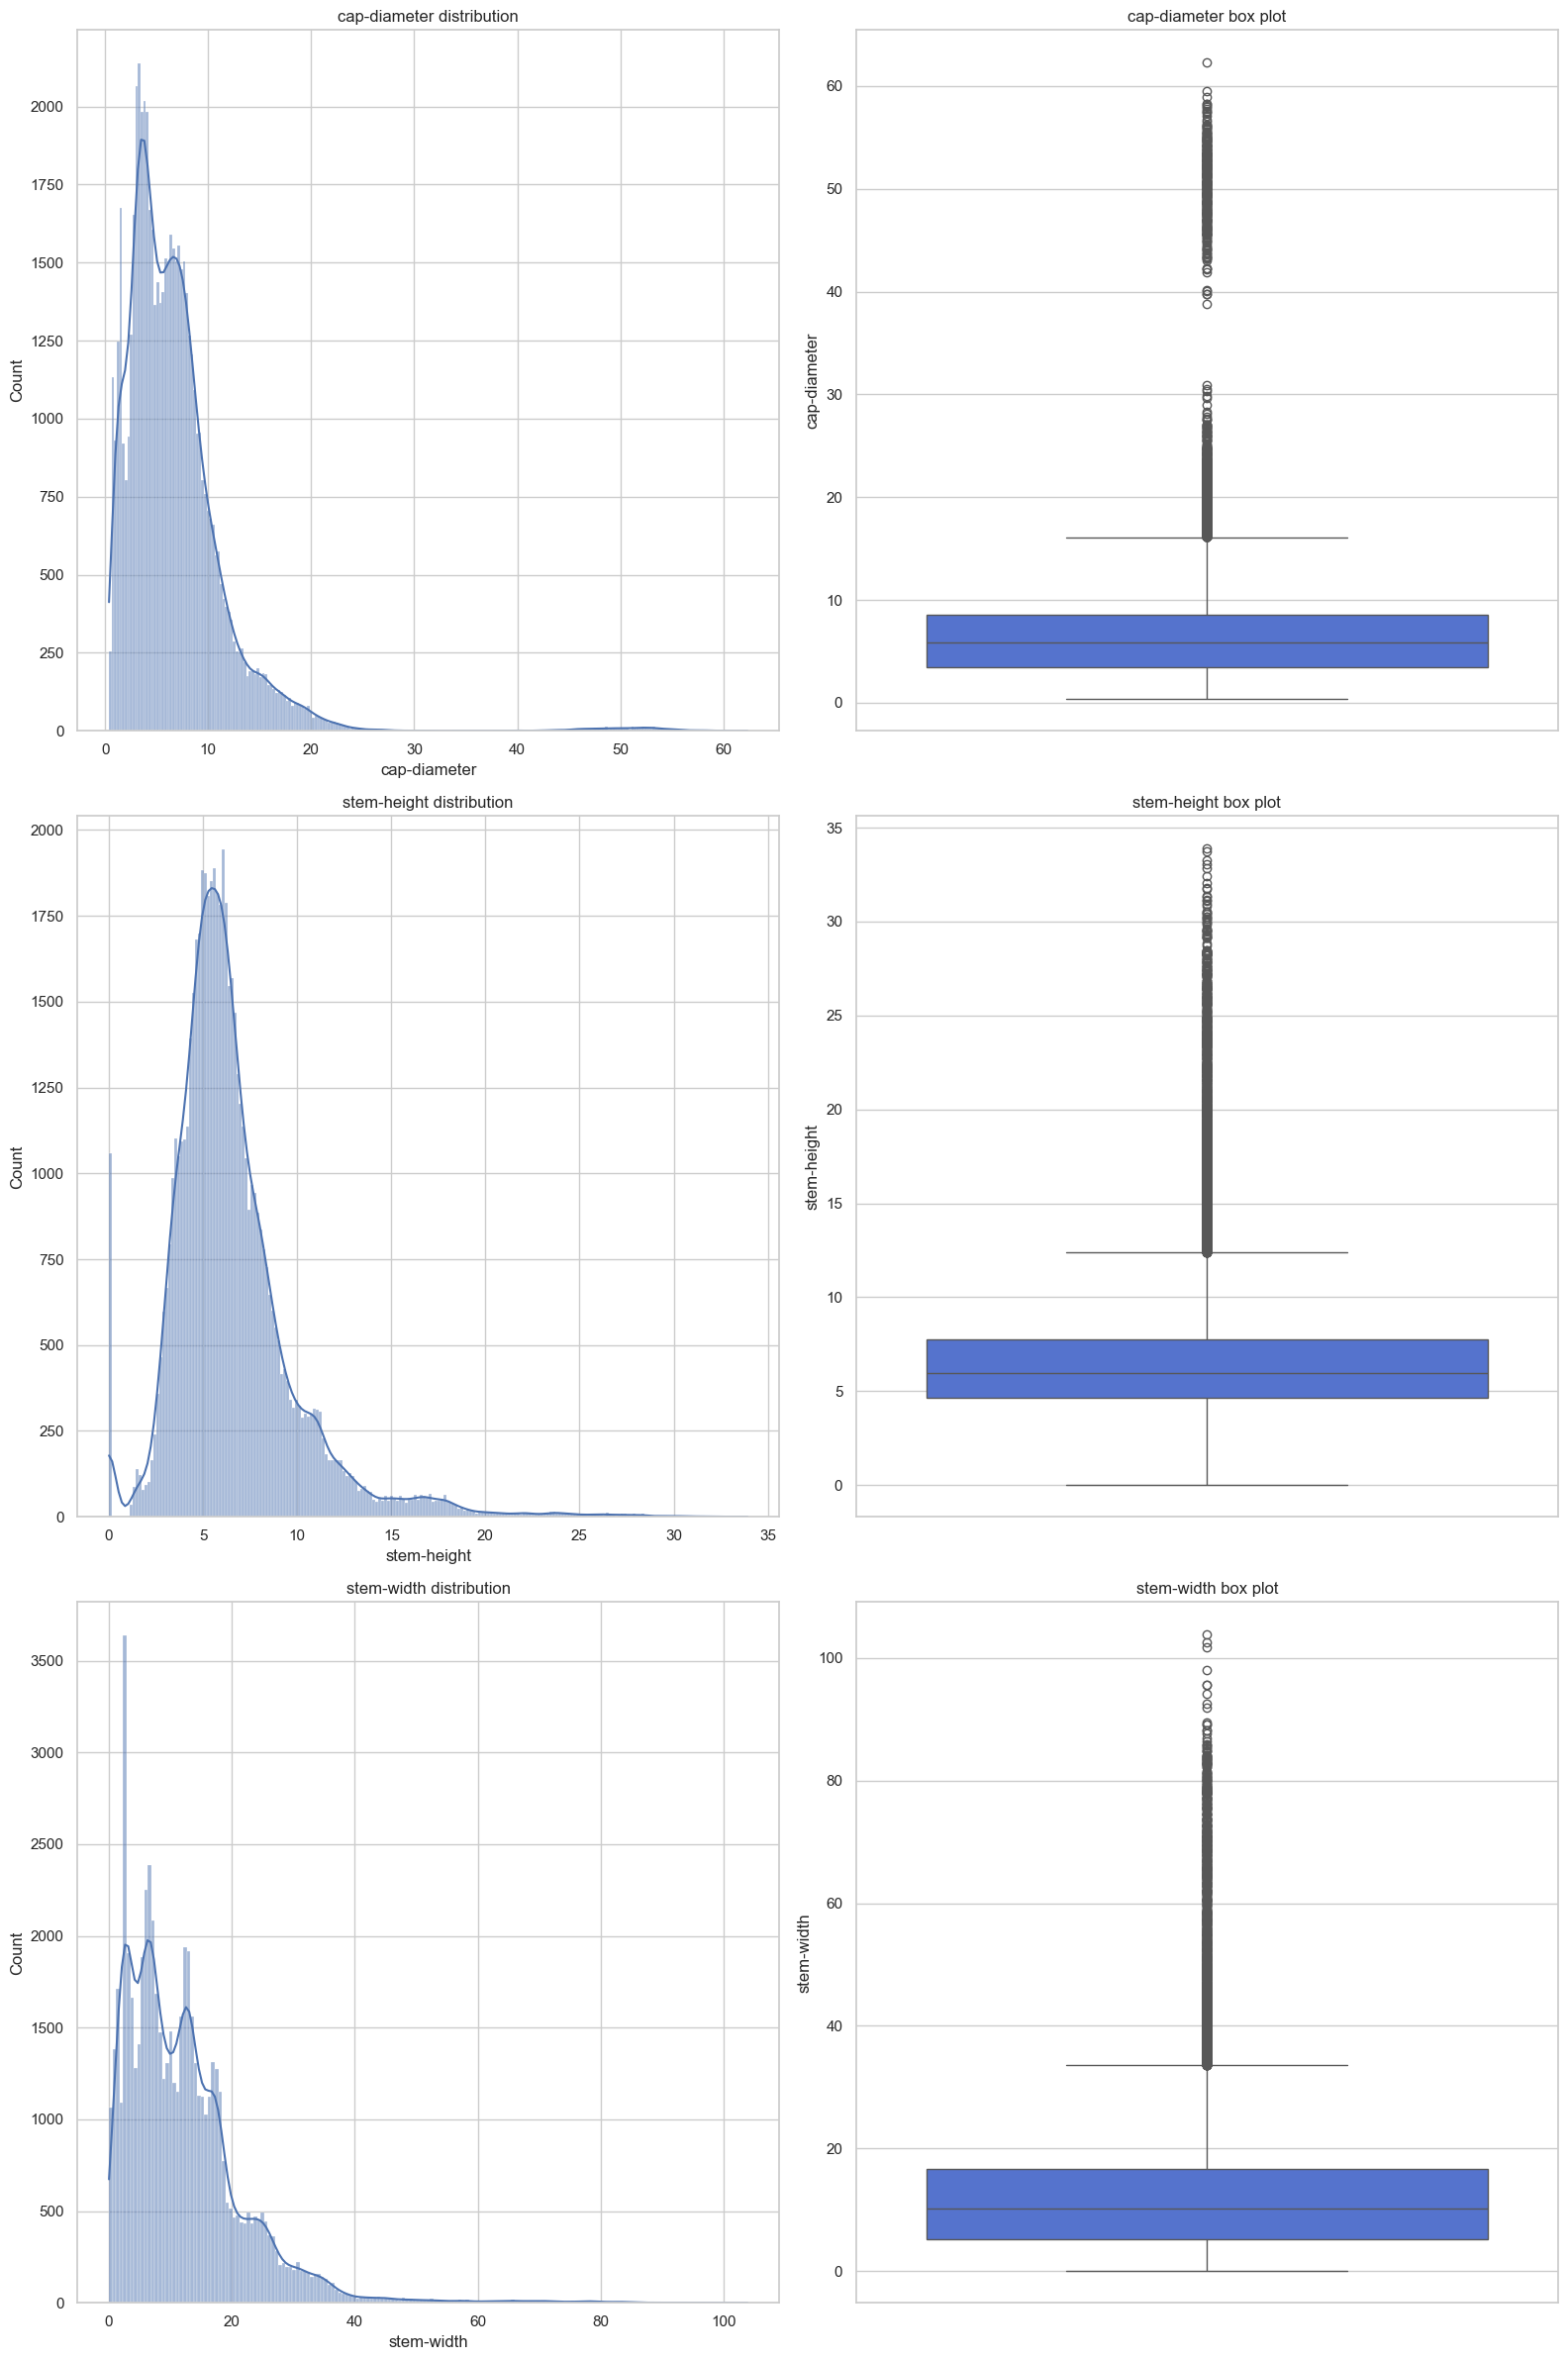

In [75]:
# Plotando gráficos da distribuição das variáveis numéricas

from math import floor
colors = ['royalblue','midnightblue']

fig, ax = plt.subplots(3, 2, figsize = (16, 24)) 

for k in range(3): 
    plt.subplot(3, 2, 2 * k + 1)
    sns.histplot(data=numerical_features.iloc[:, k], palette=colors, kde=True)  
    title = numerical_features.columns[k] + " distribution"
    plt.title(title)

    plt.subplot(3, 2, 2 * k + 2)
    sns.boxplot(y=numerical_features.iloc[:, k], palette=colors) 
    title = numerical_features.columns[k] + " box plot"
    plt.title(title)

plt.tight_layout()
plt.show()

In [76]:
# Separando as variáveis categóricas
categorical_feature = data.drop(columns=numerical_features.columns)

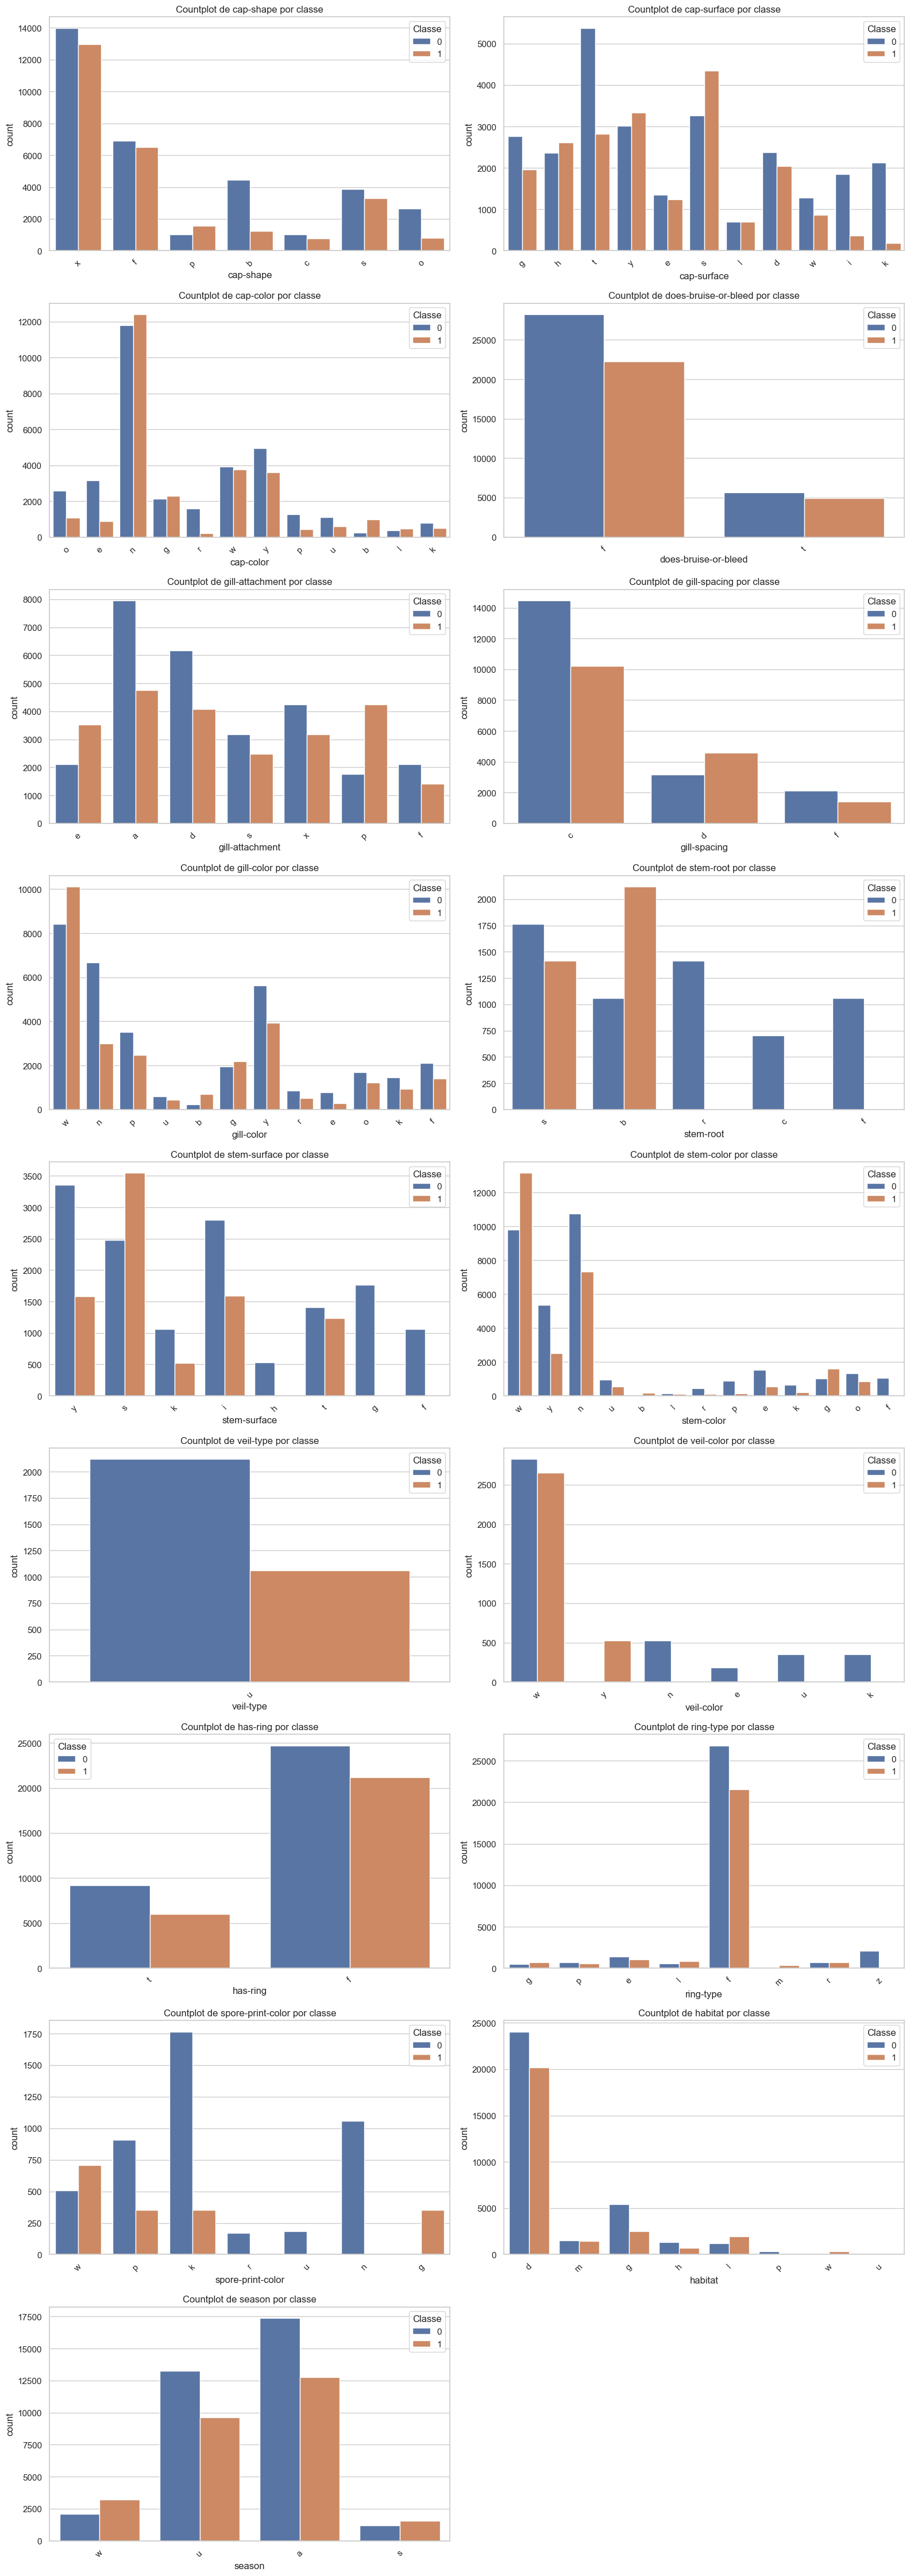

In [77]:
# Plotando as características dos cogumelos relacionando com a classe

non_class_categorical_features = categorical_feature.drop(columns=['class'])

num_cols = len(non_class_categorical_features.columns)
num_rows = (num_cols + 1) // 2
num_cols = min(2, num_cols)

plt.figure(figsize=(16, 5*num_rows))

for i, column in enumerate(non_class_categorical_features.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.countplot(x=column, hue='class', data=data)
    plt.title(f'Countplot de {column} por classe')
    plt.xticks(rotation=45)  
    plt.legend(title='Classe')

plt.tight_layout()

plt.show()

# Modelagem

In [78]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, precision_recall_curve, auc, roc_auc_score, f1_score, confusion_matrix, accuracy_score

# Encoder para tratamento de variáveis categóricas
from category_encoders import CatBoostEncoder

# Pipelines
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Importando biblioteca para tunagem de hiperparâmetros
import optuna as opt

# Configurar para não exibir warnings
from warnings import filterwarnings
filterwarnings('ignore')

import optuna as opt

In [79]:
X = data.drop('class', axis=1)
y = data['class']

In [80]:
#Dividindo dados em treino e teste 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Instanciando modelos**

- **n_estimators**: Número de árvores
- **n_jobs** = -1: Usa todos os núcleos de processamento

In [81]:
modelo_XGBoost = XGBClassifier(n_estimators = 1000, max_depth = 8, learning_rate = 1e-3, n_jobs = -1, random_state = 0, eval_metric = 'error')
modelo_LightGBM = LGBMClassifier(n_estimators = 1000, max_depth = 8, num_leaves = 2^8, learning_rate = 1e-3, n_jobs = -1, random_state = 0, is_unbalance = False, verbose = -1)
modelo_catboost = CatBoostClassifier(n_estimators = 1000, max_depth = 8, learning_rate = 1e-3, random_state = 0, verbose = 0)
modelo_logistic_regression = LogisticRegression(random_state = 0, n_jobs = -1, solver = 'lbfgs', max_iter = 1000) 

In [82]:
# Função para aplicação da validação cruzada para obtenção das métricas dos modelos

def validacao_cruzada(X,y, modelo, k, threshold):

    folds = StratifiedKFold(n_splits = k, shuffle = True, random_state = 42)

    # Criando listas para armazenar os valores de precisão, revocação, acurácia, medida-F1, precision_recall_auc e roc_auc
    # em cada fold
    precisoes = list()
    revocacoes = list()
    acuracias = list()
    Medida_F1 = list()
    precision_recall_auc = list()
    rocs_auc = list()
    cm_total = np.zeros((2,2))

    # Será aplicado o método "split" no objeto folds, que retornará uma lista 
    # com os índices das instâncias que pertencem ao conjunto de treino e 
    # outra com os índices das instâncias que pertencem ao conjunto de teste
    
    for k, (train_index, test_index) in enumerate(folds.split(X, y)):
        print("=-"*7 + f"Fold: {k + 1}" + "=-"*7)

        # Dividindo os dados em treino e teste para cada um dos folds
        X_train_interno, y_train_interno = X.iloc[train_index, :], y.iloc[train_index]
        X_test_interno, y_test_interno = X.iloc[test_index, :], y.iloc[test_index]
                
        # train_index e test_index: São os índices das instâncias do conjunto 
        # de treino e teste, respectivamente, selecionados em cada um dos folds
        
        ###########################################
        ############## Preprocessing ##############
        ###########################################
    
        # Instanciando o CatBoost Encoder
        encoder = CatBoostEncoder()

        # Criando um imputer para preencher com a moda os valores faltantes de variáveis categóricas
        cat_imputer = SimpleImputer(strategy = 'most_frequent')

        # Criando um imputer para preencher com a mediana os valores faltantes de variáveis numéricas
        num_imputer = SimpleImputer(strategy = 'median')

        # Criando pipelines para variáveis categóricas e numéricas que preenche os valores faltantes
        cat_pipeline = Pipeline([('encoder', encoder), ('imputer', cat_imputer)])
        num_pipeline = Pipeline([('imputer', num_imputer)])

        # Identifica as variáveis categóricas e numéricas
        cat_cols = X_train_interno.select_dtypes(include = ['object']).columns
        num_cols = X_train_interno.select_dtypes(exclude = ['object']).columns

        # Aplicando os pipelines no conjunto de treinamento para preencher valores faltantes em colunas categóricas e numéricas
        X_train_interno[cat_cols] = cat_pipeline.fit_transform(X_train_interno[cat_cols], y_train_interno)
        X_train_interno[num_cols] = num_pipeline.fit_transform(X_train_interno[num_cols])

        # Aplicando os pipelines ao conjunto de teste para preencher valores faltantes em colunas categóricas e numéricas
        X_test_interno[cat_cols] = cat_pipeline.transform(X_test_interno[cat_cols])
        X_test_interno[num_cols] = num_pipeline.transform(X_test_interno[num_cols])

        # Treinando o modelo
        modelo.fit(X_train_interno, y_train_interno)

        # Obtendo as probabilidades relacionadas a classe 1
        y_pred_proba = modelo.predict_proba(X_test_interno)[:,1]

        # Obtendo as previsões do modelo
        y_pred = np.where(y_pred_proba > threshold, 1, 0)

        # Calculando a precisão e revocação para determinar a precision_recall_auc
        precisao, revocacao, limiares = precision_recall_curve(y_test_interno, y_pred)

        # Determinando as métricas para cada fold
        cm_total += confusion_matrix(y_test_interno, y_pred)
        precisao_revocacao_auc = auc(revocacao, precisao)
        roc_auc = roc_auc_score(y_test_interno, y_pred_proba)
        acuracia_score = accuracy_score(y_test_interno, y_pred)
        precisao_score = precision_score(y_test_interno, y_pred)
        revocacao_score = recall_score(y_test_interno, y_pred)
        f1score = f1_score(y_test_interno, y_pred)

        # Armazenando as métricas nas listas criadas
        precisoes.append(precisao_score)
        revocacoes.append(revocacao_score)
        precision_recall_auc.append(precisao_revocacao_auc)
        rocs_auc.append(roc_auc)
        acuracias.append(acuracia_score)
        Medida_F1.append(f1score)

        # Exibindo as métricas para cada um dos folds
        print(f"Precisão: {precisao_score:.3f}")
        print(f"Revocação: {revocacao_score:.3f}")
        print(f"Acurácia: {acuracia_score:.3f}")
        print(f"Medida F1: {f1score:.3f}")
        print(f"Precision_recall AUC: {precisao_revocacao_auc:.3f}")
        print(f"ROC AUC: {roc_auc:.3f}")

    # Transformando as listas em arrays para fazer operações matemáticas
    precisoes = np.array(precisoes)
    revocacoes = np.array(revocacoes)
    acuracias = np.array(acuracias)
    Medida_F1 = np.array(Medida_F1)
    precision_recall_auc = np.array(precision_recall_auc)
    rocs_auc = np.array(rocs_auc)

    # Calculando as médias das métricas
    media_precisao = np.mean(precisoes)
    media_revocacao = np.mean(revocacoes)
    media_acuracia = np.mean(acuracias)
    media_F1 = np.mean(Medida_F1)
    media_pr_AUC = np.mean(precision_recall_auc)
    media_roc_AUC = np.mean(rocs_auc)

    # Calculando os desvios padrão para cada métrica
    std_precisao = np.std(precisoes)
    std_revocacao = np.std(revocacoes)
    std_acuracia = np.std(acuracias)
    std_F1 = np.std(Medida_F1)
    std_pr_AUC = np.std(precision_recall_auc)
    std_roc_AUC = np.std(rocs_auc)

    # Exibindo as médias das métricas obtidas
    print()
    print("=-"*6 + "Exibindo a média das métricas obtidas" + "-="*6)
    print(f"Média da precisão: {media_precisao:.3f} +/- {std_precisao:.3f}")
    print(f"Média da revocação: {media_revocacao:.3f} +/- {std_revocacao:.3f}")
    print(f"Média da acurácia: {media_acuracia:.3f} +/- {std_acuracia:.3f}")
    print(f"Média da Medida F1: {media_F1:.3f} +/- {std_F1:.3f}")
    print(f"Média da Precision/Recall AUC: {media_pr_AUC:.3f} +/- {std_pr_AUC:.3f}")
    print(f"Média da ROC AUC: {media_roc_AUC:.3f} +/- {std_roc_AUC:.3f}")

    # Plotando a matriz de confusão
    plt.figure(figsize = (8,6))
    sns.heatmap(cm_total, annot=True, fmt = ".0f", cmap = 'Blues')
    plt.title("Matriz de Confusão de Todos os Folds")
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')
    plt.show()

XGBoost Classifier

=-=-=-=-=-=-=-Fold: 1=-=-=-=-=-=-=-
Precisão: 0.704
Revocação: 0.756
Acurácia: 0.750
Medida F1: 0.729
Precision_recall AUC: 0.785
ROC AUC: 0.803
=-=-=-=-=-=-=-Fold: 2=-=-=-=-=-=-=-
Precisão: 0.729
Revocação: 0.743
Acurácia: 0.763
Medida F1: 0.736
Precision_recall AUC: 0.793
ROC AUC: 0.815
=-=-=-=-=-=-=-Fold: 3=-=-=-=-=-=-=-
Precisão: 0.715
Revocação: 0.698
Acurácia: 0.742
Medida F1: 0.706
Precision_recall AUC: 0.773
ROC AUC: 0.804
=-=-=-=-=-=-=-Fold: 4=-=-=-=-=-=-=-
Precisão: 0.717
Revocação: 0.673
Acurácia: 0.736
Medida F1: 0.694
Precision_recall AUC: 0.768
ROC AUC: 0.798
=-=-=-=-=-=-=-Fold: 5=-=-=-=-=-=-=-
Precisão: 0.712
Revocação: 0.714
Acurácia: 0.744
Medida F1: 0.713
Precision_recall AUC: 0.776
ROC AUC: 0.805

=-=-=-=-=-=-Exibindo a média das métricas obtidas-=-=-=-=-=-=
Média da precisão: 0.715 +/- 0.008
Média da revocação: 0.717 +/- 0.030
Média da acurácia: 0.747 +/- 0.009
Média da Medida F1: 0.716 +/- 0.015
Média da Precision/Recall AUC: 0.779 +/- 0.009
Média da ROC AUC: 0.805

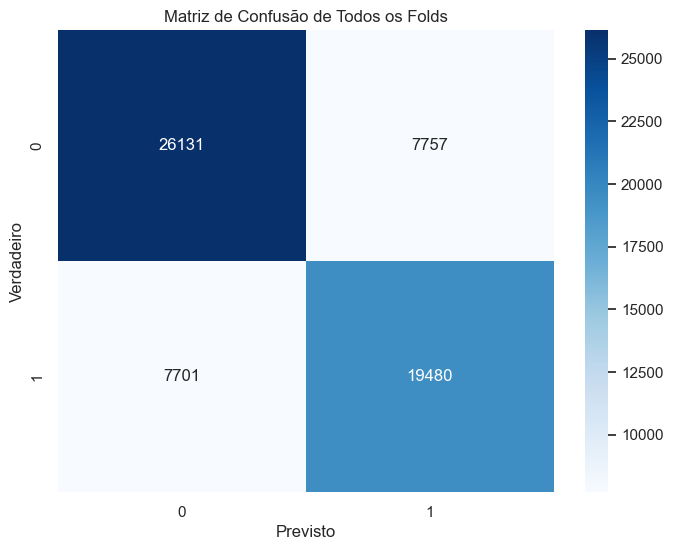

In [83]:
#xgboost
validacao_cruzada(X,y, modelo_XGBoost, k = 5, threshold = 0.5)

Light GBM Classifier

=-=-=-=-=-=-=-Fold: 1=-=-=-=-=-=-=-
Precisão: 0.695
Revocação: 0.686
Acurácia: 0.726
Medida F1: 0.691
Precision_recall AUC: 0.760
ROC AUC: 0.796
=-=-=-=-=-=-=-Fold: 2=-=-=-=-=-=-=-
Precisão: 0.750
Revocação: 0.585
Acurácia: 0.728
Medida F1: 0.657
Precision_recall AUC: 0.760
ROC AUC: 0.797
=-=-=-=-=-=-=-Fold: 3=-=-=-=-=-=-=-
Precisão: 0.712
Revocação: 0.635
Acurácia: 0.723
Medida F1: 0.671
Precision_recall AUC: 0.755
ROC AUC: 0.801
=-=-=-=-=-=-=-Fold: 4=-=-=-=-=-=-=-
Precisão: 0.690
Revocação: 0.699
Acurácia: 0.726
Medida F1: 0.695
Precision_recall AUC: 0.762
ROC AUC: 0.795
=-=-=-=-=-=-=-Fold: 5=-=-=-=-=-=-=-
Precisão: 0.713
Revocação: 0.676
Acurácia: 0.735
Medida F1: 0.694
Precision_recall AUC: 0.767
ROC AUC: 0.796

=-=-=-=-=-=-Exibindo a média das métricas obtidas-=-=-=-=-=-=
Média da precisão: 0.712 +/- 0.021
Média da revocação: 0.656 +/- 0.042
Média da acurácia: 0.728 +/- 0.004
Média da Medida F1: 0.682 +/- 0.015
Média da Precision/Recall AUC: 0.761 +/- 0.004
Média da ROC AUC: 0.797

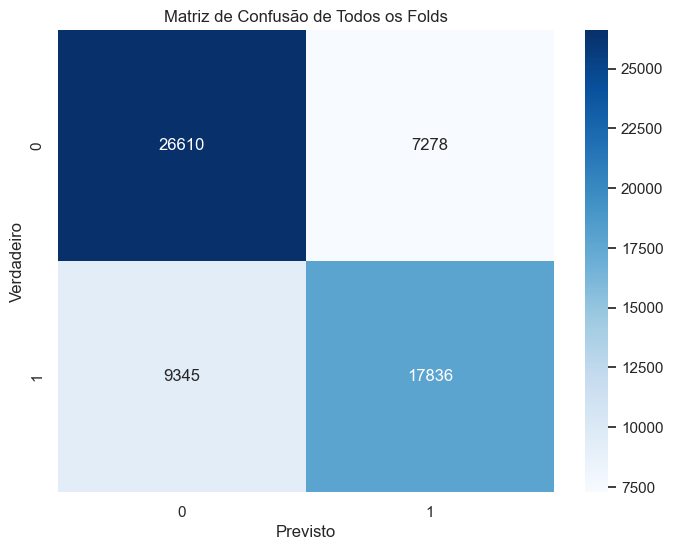

In [84]:
#lighgbm
validacao_cruzada(X,y, modelo_LightGBM, k = 5, threshold = 0.5)

CatBoost Classifier

=-=-=-=-=-=-=-Fold: 1=-=-=-=-=-=-=-
Precisão: 0.767
Revocação: 0.700
Acurácia: 0.772
Medida F1: 0.732
Precision_recall AUC: 0.800
ROC AUC: 0.838
=-=-=-=-=-=-=-Fold: 2=-=-=-=-=-=-=-
Precisão: 0.757
Revocação: 0.702
Acurácia: 0.767
Medida F1: 0.729
Precision_recall AUC: 0.796
ROC AUC: 0.842
=-=-=-=-=-=-=-Fold: 3=-=-=-=-=-=-=-
Precisão: 0.769
Revocação: 0.690
Acurácia: 0.770
Medida F1: 0.727
Precision_recall AUC: 0.798
ROC AUC: 0.839
=-=-=-=-=-=-=-Fold: 4=-=-=-=-=-=-=-
Precisão: 0.772
Revocação: 0.702
Acurácia: 0.775
Medida F1: 0.735
Precision_recall AUC: 0.803
ROC AUC: 0.833
=-=-=-=-=-=-=-Fold: 5=-=-=-=-=-=-=-
Precisão: 0.750
Revocação: 0.703
Acurácia: 0.764
Medida F1: 0.726
Precision_recall AUC: 0.793
ROC AUC: 0.834

=-=-=-=-=-=-Exibindo a média das métricas obtidas-=-=-=-=-=-=
Média da precisão: 0.763 +/- 0.008
Média da revocação: 0.700 +/- 0.005
Média da acurácia: 0.770 +/- 0.004
Média da Medida F1: 0.730 +/- 0.003
Média da Precision/Recall AUC: 0.798 +/- 0.004
Média da ROC AUC: 0.837

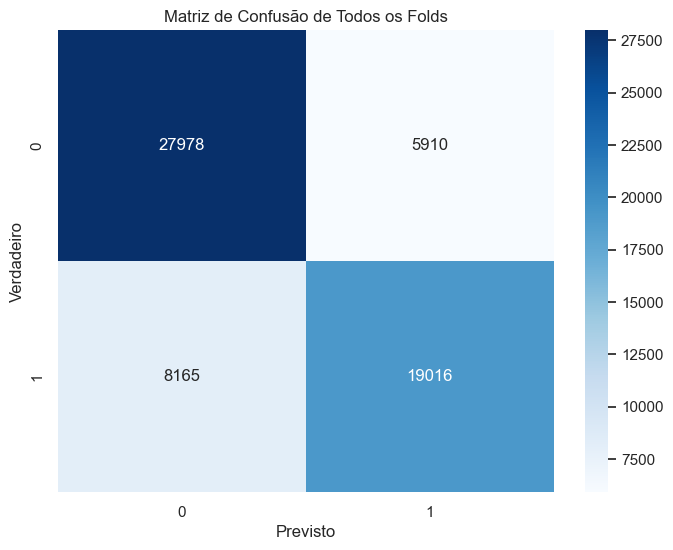

In [85]:
#catboost
validacao_cruzada(X,y, modelo_catboost, k = 5, threshold = 0.5)

Regressão Logística

=-=-=-=-=-=-=-Fold: 1=-=-=-=-=-=-=-
Precisão: 0.742
Revocação: 0.611
Acurácia: 0.732
Medida F1: 0.670
Precision_recall AUC: 0.763
ROC AUC: 0.818
=-=-=-=-=-=-=-Fold: 2=-=-=-=-=-=-=-
Precisão: 0.749
Revocação: 0.598
Acurácia: 0.732
Medida F1: 0.665
Precision_recall AUC: 0.763
ROC AUC: 0.814
=-=-=-=-=-=-=-Fold: 3=-=-=-=-=-=-=-
Precisão: 0.745
Revocação: 0.604
Acurácia: 0.732
Medida F1: 0.667
Precision_recall AUC: 0.763
ROC AUC: 0.822
=-=-=-=-=-=-=-Fold: 4=-=-=-=-=-=-=-
Precisão: 0.734
Revocação: 0.592
Acurácia: 0.723
Medida F1: 0.655
Precision_recall AUC: 0.754
ROC AUC: 0.813
=-=-=-=-=-=-=-Fold: 5=-=-=-=-=-=-=-
Precisão: 0.744
Revocação: 0.600
Acurácia: 0.730
Medida F1: 0.664
Precision_recall AUC: 0.761
ROC AUC: 0.818

=-=-=-=-=-=-Exibindo a média das métricas obtidas-=-=-=-=-=-=
Média da precisão: 0.743 +/- 0.005
Média da revocação: 0.601 +/- 0.007
Média da acurácia: 0.730 +/- 0.003
Média da Medida F1: 0.664 +/- 0.005
Média da Precision/Recall AUC: 0.761 +/- 0.003
Média da ROC AUC: 0.817

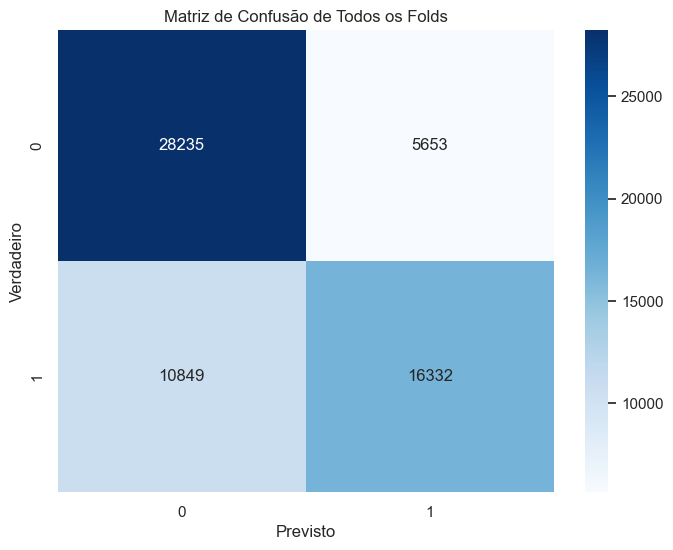

In [86]:
#reg logistica
validacao_cruzada(X,y, modelo_logistic_regression, k = 5, threshold = 0.5)

Analisando o desempenho dos quatro modelos testados (XGBoost, LightGBM, CatBoost e Logistic Regression), é possível observar que o que obteve melhor desempenho foi o catboost, portanto iremos usar ele e tunar seus hiperparâmetros.

### Tunagem de Hiperparâmetros

A métrica escolhida para ser maximizada na tunagem dos hiperparâmetros foi a precisão.

A precisão é a proporção de previsões corretas positivas em relação ao total de previsões positivas, ou seja, estamos verificando, dentre as previsões positivas, quais estão corretas. Essa métrica é importante nesse caso pois, se o modelo disser que o cogumelo é comestível, ele realmente tem que ser.

In [87]:
def tunagem_hiperparametros(trial, k = 5, threshold = 0.5):

    # Tunagem Hiperparâmetros
    
    learning_rate = trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True)
    max_depth = trial.suggest_int('max_depth', 1, 10)
    subsample = trial.suggest_float('subsample', 0, 1, step=0.1)
    colsample_bylevel = trial.suggest_float('colsample_bylevel', 0, 1, step=0.1)
    n_estimators = trial.suggest_int('n_estimators', 100, 2000, step = 100)

    # Inicializando a função StratifiedKFold
    folds = StratifiedKFold(n_splits = k, shuffle = True, random_state = 42)

    # Criando listas para armazenar os valores de precisão, revocação, acurácia, medida-F1, precision_recall_auc e roc_auc
    # em cada fold
    precisoes = list()
    revocacoes = list()
    acuracias = list()
    Medida_F1 = list()
    precision_recall_auc = list()
    rocs_auc = list()
    cm_total = np.zeros((2,2))

    # Será aplicado o método "split" no objeto folds, que retornará uma lista 
    # com os índices das instâncias que pertencem ao conjunto de treino e 
    # outra com os índices das instâncias que pertencem ao conjunto de teste
    
    for k, (train_index, test_index) in enumerate(folds.split(X, y)):
        print("=- "*7 + f"Fold: {k + 1}" + " =-"*7)

        # Dividindo os dados em treino e teste para cada um dos folds
        X_train_interno, y_train_interno = X.iloc[train_index, :], y.iloc[train_index]
        X_test_interno, y_test_interno = X.iloc[test_index, :], y.iloc[test_index]
    
        # train_index e test_index: São os índices das instâncias do conjunto 
        # de treino e teste, respectivamente, selecionados em cada um dos folds
        
        ###########################################
        ############## Preprocessing ##############
        ###########################################
    
        # Instanciando o CatBoost Encoder        
        encoder = CatBoostEncoder()

        # Criando um imputer para preencher com a moda os valores faltantes de variáveis categóricas
        cat_imputer = SimpleImputer(strategy = 'most_frequent')
        
        # Criando um imputer para preencher com a mediana os valores faltantes de variáveis numéricas
        num_imputer = SimpleImputer(strategy = 'median')

        # Criando pipelines para variáveis categóricas e numéricas que preenche os valores faltantes
        cat_pipeline = Pipeline([('encoder', encoder), ('imputer', cat_imputer)])
        num_pipeline = Pipeline([('imputer', num_imputer)])

        # Identifica as variáveis categóricas e numéricas
        cat_cols = X_train_interno.select_dtypes(include = ['object']).columns
        num_cols = X_train_interno.select_dtypes(exclude = ['object']).columns

        # Aplicando os pipelines no conjunto de treinamento para preencher valores faltantes em colunas categóricas e numéricas
        X_train_interno[cat_cols] = cat_pipeline.fit_transform(X_train_interno[cat_cols], y_train_interno)
        X_train_interno[num_cols] = num_pipeline.fit_transform(X_train_interno[num_cols])

        # Aplicando os pipelines ao conjunto de teste para preencher valores faltantes em colunas categóricas e numéricas
        X_test_interno[cat_cols] = cat_pipeline.transform(X_test_interno[cat_cols])
        X_test_interno[num_cols] = num_pipeline.transform(X_test_interno[num_cols])

        # Instanciando o modelo
        modelo_catboost = CatBoostClassifier(n_estimators = n_estimators, max_depth = max_depth, learning_rate = learning_rate, random_state = 0, verbose = 0, eval_metric = 'Logloss')

        # Treinando o modelo CatBoost
        modelo_catboost.fit(X_train_interno, y_train_interno)

        # Obtendo as probabilidades relacionadas a classe 1
        y_pred_proba = modelo_catboost.predict_proba(X_test_interno)[:,1]

        # Obtendo as previsões do modelo
        y_pred = np.where(y_pred_proba > threshold, 1, 0)

        # Calculando a precisão e revocação para determinar a precision_recall_auc
        precisao, revocacao, limiares = precision_recall_curve(y_test_interno, y_pred)

        # Determinando as métricas para cada fold
        cm_total += confusion_matrix(y_test_interno, y_pred)
        precisao_revocacao_auc = auc(revocacao, precisao)
        roc_auc = roc_auc_score(y_test_interno, y_pred_proba)
        acuracia_score = accuracy_score(y_test_interno, y_pred)
        precisao_score = precision_score(y_test_interno, y_pred)
        revocacao_score = recall_score(y_test_interno, y_pred)
        f1score = f1_score(y_test_interno, y_pred)

        # Armazenando as métricas nas listas criadas
        precisoes.append(precisao_score)
        revocacoes.append(revocacao_score)
        precision_recall_auc.append(precisao_revocacao_auc)
        rocs_auc.append(roc_auc)
        acuracias.append(acuracia_score)
        Medida_F1.append(f1score)

    # Transformando as listas em arrays para fazer operações matemáticas
    precisoes = np.array(precisoes)
    revocacoes = np.array(revocacoes)
    acuracias = np.array(acuracias)
    Medida_F1 = np.array(Medida_F1)
    precision_recall_auc = np.array(precision_recall_auc)
    rocs_auc = np.array(rocs_auc)

    # Calculando as médias das métricas
    media_precisao = np.mean(precisoes)
    media_revocacao = np.mean(revocacoes)
    media_acuracia = np.mean(acuracias)
    media_F1 = np.mean(Medida_F1)
    media_pr_AUC = np.mean(precision_recall_auc)
    media_roc_AUC = np.mean(rocs_auc)
    
    return media_precisao

study = opt.create_study(direction='maximize')
study.optimize(tunagem_hiperparametros, n_trials=20)

[I 2024-04-27 18:33:20,741] A new study created in memory with name: no-name-82597b5a-aa24-41a7-80f3-e003a3123d93


=- =- =- =- =- =- =- Fold: 1 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 2 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 3 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 4 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 5 =- =- =- =- =- =- =-


[I 2024-04-27 18:34:04,930] Trial 0 finished with value: 0.7644159470759103 and parameters: {'learning_rate': 0.00697271849537884, 'max_depth': 4, 'subsample': 1.0, 'colsample_bylevel': 0.0, 'n_estimators': 600}. Best is trial 0 with value: 0.7644159470759103.


=- =- =- =- =- =- =- Fold: 1 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 2 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 3 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 4 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 5 =- =- =- =- =- =- =-


[I 2024-04-27 18:36:05,154] Trial 1 finished with value: 0.7498055966972506 and parameters: {'learning_rate': 0.003983517480091147, 'max_depth': 6, 'subsample': 0.4, 'colsample_bylevel': 1.0, 'n_estimators': 1300}. Best is trial 0 with value: 0.7644159470759103.


=- =- =- =- =- =- =- Fold: 1 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 2 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 3 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 4 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 5 =- =- =- =- =- =- =-


[I 2024-04-27 18:36:31,690] Trial 2 finished with value: 0.7168198513676876 and parameters: {'learning_rate': 0.07240831209998293, 'max_depth': 3, 'subsample': 0.5, 'colsample_bylevel': 0.30000000000000004, 'n_estimators': 400}. Best is trial 0 with value: 0.7644159470759103.


=- =- =- =- =- =- =- Fold: 1 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 2 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 3 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 4 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 5 =- =- =- =- =- =- =-


[I 2024-04-27 18:37:51,363] Trial 3 finished with value: 0.6881611671255442 and parameters: {'learning_rate': 0.09644839258889461, 'max_depth': 1, 'subsample': 0.7000000000000001, 'colsample_bylevel': 0.30000000000000004, 'n_estimators': 1800}. Best is trial 0 with value: 0.7644159470759103.


=- =- =- =- =- =- =- Fold: 1 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 2 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 3 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 4 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 5 =- =- =- =- =- =- =-


[I 2024-04-27 18:38:59,412] Trial 4 finished with value: 0.7742349308678864 and parameters: {'learning_rate': 0.003225613661331423, 'max_depth': 5, 'subsample': 1.0, 'colsample_bylevel': 0.9, 'n_estimators': 900}. Best is trial 4 with value: 0.7742349308678864.


=- =- =- =- =- =- =- Fold: 1 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 2 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 3 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 4 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 5 =- =- =- =- =- =- =-


[I 2024-04-27 18:40:11,655] Trial 5 finished with value: 0.7480965087206348 and parameters: {'learning_rate': 0.007411734137893888, 'max_depth': 3, 'subsample': 0.9, 'colsample_bylevel': 0.0, 'n_estimators': 1200}. Best is trial 4 with value: 0.7742349308678864.


=- =- =- =- =- =- =- Fold: 1 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 2 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 3 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 4 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 5 =- =- =- =- =- =- =-


[I 2024-04-27 18:40:36,572] Trial 6 finished with value: 0.7588372350002822 and parameters: {'learning_rate': 0.013624517005142363, 'max_depth': 7, 'subsample': 0.2, 'colsample_bylevel': 0.30000000000000004, 'n_estimators': 200}. Best is trial 4 with value: 0.7742349308678864.


=- =- =- =- =- =- =- Fold: 1 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 2 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 3 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 4 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 5 =- =- =- =- =- =- =-


[I 2024-04-27 18:41:40,247] Trial 7 finished with value: 0.76686452592775 and parameters: {'learning_rate': 0.004503272149176203, 'max_depth': 5, 'subsample': 0.30000000000000004, 'colsample_bylevel': 0.0, 'n_estimators': 800}. Best is trial 4 with value: 0.7742349308678864.


=- =- =- =- =- =- =- Fold: 1 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 2 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 3 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 4 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 5 =- =- =- =- =- =- =-


[I 2024-04-27 18:42:58,052] Trial 8 finished with value: 0.7413596915952265 and parameters: {'learning_rate': 0.0010082191138882266, 'max_depth': 4, 'subsample': 0.5, 'colsample_bylevel': 0.4, 'n_estimators': 1100}. Best is trial 4 with value: 0.7742349308678864.


=- =- =- =- =- =- =- Fold: 1 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 2 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 3 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 4 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 5 =- =- =- =- =- =- =-


[I 2024-04-27 18:45:18,240] Trial 9 finished with value: 0.7278743021415581 and parameters: {'learning_rate': 0.025899422631493252, 'max_depth': 6, 'subsample': 0.0, 'colsample_bylevel': 0.1, 'n_estimators': 1900}. Best is trial 4 with value: 0.7742349308678864.


=- =- =- =- =- =- =- Fold: 1 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 2 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 3 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 4 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 5 =- =- =- =- =- =- =-


[I 2024-04-27 18:57:16,936] Trial 10 finished with value: 0.7485976678797785 and parameters: {'learning_rate': 0.0014153095635975176, 'max_depth': 10, 'subsample': 0.8, 'colsample_bylevel': 0.9, 'n_estimators': 1500}. Best is trial 4 with value: 0.7742349308678864.


=- =- =- =- =- =- =- Fold: 1 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 2 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 3 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 4 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 5 =- =- =- =- =- =- =-


[I 2024-04-27 19:00:13,423] Trial 11 finished with value: 0.7676028711095049 and parameters: {'learning_rate': 0.002883332002462198, 'max_depth': 8, 'subsample': 0.2, 'colsample_bylevel': 0.7000000000000001, 'n_estimators': 800}. Best is trial 4 with value: 0.7742349308678864.


=- =- =- =- =- =- =- Fold: 1 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 2 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 3 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 4 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 5 =- =- =- =- =- =- =-


[I 2024-04-27 19:04:29,841] Trial 12 finished with value: 0.7573475938024661 and parameters: {'learning_rate': 0.0022071410293260448, 'max_depth': 9, 'subsample': 0.0, 'colsample_bylevel': 0.7000000000000001, 'n_estimators': 800}. Best is trial 4 with value: 0.7742349308678864.


=- =- =- =- =- =- =- Fold: 1 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 2 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 3 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 4 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 5 =- =- =- =- =- =- =-


[I 2024-04-27 19:07:41,743] Trial 13 finished with value: 0.7738390578309626 and parameters: {'learning_rate': 0.0024422773585094947, 'max_depth': 8, 'subsample': 0.7000000000000001, 'colsample_bylevel': 0.7000000000000001, 'n_estimators': 800}. Best is trial 4 with value: 0.7742349308678864.


=- =- =- =- =- =- =- Fold: 1 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 2 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 3 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 4 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 5 =- =- =- =- =- =- =-


[I 2024-04-27 19:08:18,158] Trial 14 finished with value: 0.68254523795594 and parameters: {'learning_rate': 0.0018427723666667223, 'max_depth': 8, 'subsample': 0.7000000000000001, 'colsample_bylevel': 0.7000000000000001, 'n_estimators': 100}. Best is trial 4 with value: 0.7742349308678864.


=- =- =- =- =- =- =- Fold: 1 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 2 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 3 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 4 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 5 =- =- =- =- =- =- =-


[I 2024-04-27 19:12:25,212] Trial 15 finished with value: 0.7233423648117793 and parameters: {'learning_rate': 0.01649716538241362, 'max_depth': 7, 'subsample': 1.0, 'colsample_bylevel': 0.8, 'n_estimators': 1500}. Best is trial 4 with value: 0.7742349308678864.


=- =- =- =- =- =- =- Fold: 1 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 2 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 3 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 4 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 5 =- =- =- =- =- =- =-


[I 2024-04-27 19:15:07,499] Trial 16 finished with value: 0.7567201428160181 and parameters: {'learning_rate': 0.0038624877493211064, 'max_depth': 9, 'subsample': 0.7000000000000001, 'colsample_bylevel': 0.6000000000000001, 'n_estimators': 500}. Best is trial 4 with value: 0.7742349308678864.


=- =- =- =- =- =- =- Fold: 1 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 2 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 3 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 4 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 5 =- =- =- =- =- =- =-


[I 2024-04-27 19:16:22,651] Trial 17 finished with value: 0.7153231502201989 and parameters: {'learning_rate': 0.006476011205451419, 'max_depth': 1, 'subsample': 0.8, 'colsample_bylevel': 1.0, 'n_estimators': 1000}. Best is trial 4 with value: 0.7742349308678864.


=- =- =- =- =- =- =- Fold: 1 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 2 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 3 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 4 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 5 =- =- =- =- =- =- =-


[I 2024-04-27 19:17:46,400] Trial 18 finished with value: 0.7586367895113433 and parameters: {'learning_rate': 0.0010624387039867762, 'max_depth': 5, 'subsample': 0.6000000000000001, 'colsample_bylevel': 0.5, 'n_estimators': 900}. Best is trial 4 with value: 0.7742349308678864.


=- =- =- =- =- =- =- Fold: 1 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 2 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 3 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 4 =- =- =- =- =- =- =-
=- =- =- =- =- =- =- Fold: 5 =- =- =- =- =- =- =-


[I 2024-04-27 19:19:07,599] Trial 19 finished with value: 0.7700057101902682 and parameters: {'learning_rate': 0.0024270929600001987, 'max_depth': 7, 'subsample': 0.9, 'colsample_bylevel': 0.9, 'n_estimators': 600}. Best is trial 4 with value: 0.7742349308678864.


In [90]:
# Os hiperparâmetros que geraram a melhor taxa de precisão foram esses:
params = {'learning_rate': 0.06068482820398847, 'max_depth': 4, 'subsample': 0.4, 'colsample_bylevel': 0.1, 'n_estimators': 500}

In [93]:
modelo_catboost = CatBoostClassifier(random_state = 0, **params)

=-=-=-=-=-=-=-Fold: 1=-=-=-=-=-=-=-
0:	learn: 0.6890364	total: 8.51ms	remaining: 4.25s
1:	learn: 0.6660938	total: 21.7ms	remaining: 5.4s
2:	learn: 0.6655299	total: 29.3ms	remaining: 4.86s
3:	learn: 0.6547374	total: 38.8ms	remaining: 4.82s
4:	learn: 0.6543544	total: 45.8ms	remaining: 4.54s
5:	learn: 0.6297224	total: 57.3ms	remaining: 4.72s
6:	learn: 0.6237144	total: 65.2ms	remaining: 4.59s
7:	learn: 0.6225100	total: 72.6ms	remaining: 4.46s
8:	learn: 0.6182997	total: 82ms	remaining: 4.47s
9:	learn: 0.6126751	total: 91.7ms	remaining: 4.49s
10:	learn: 0.5968616	total: 104ms	remaining: 4.64s
11:	learn: 0.5827658	total: 115ms	remaining: 4.7s
12:	learn: 0.5827119	total: 121ms	remaining: 4.53s
13:	learn: 0.5685455	total: 131ms	remaining: 4.56s
14:	learn: 0.5576785	total: 141ms	remaining: 4.55s
15:	learn: 0.5576612	total: 147ms	remaining: 4.44s
16:	learn: 0.5573384	total: 153ms	remaining: 4.33s
17:	learn: 0.5556276	total: 158ms	remaining: 4.24s
18:	learn: 0.5467015	total: 168ms	remaining: 4.26s

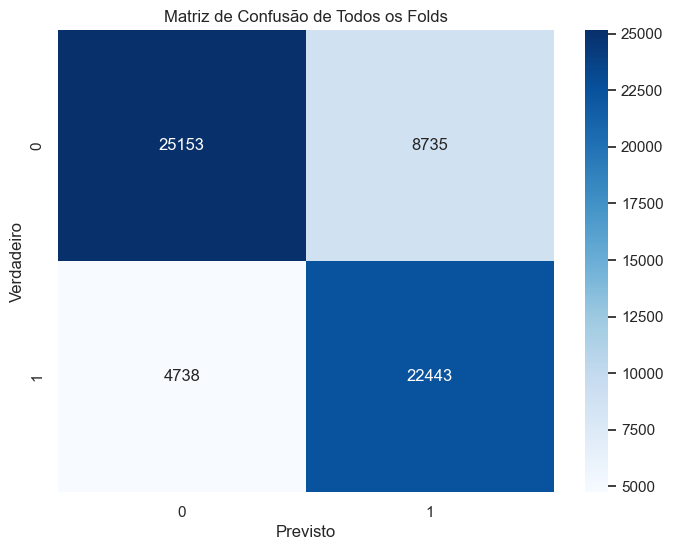

In [94]:
validacao_cruzada(X,y, modelo_catboost, k = 5, threshold = 0.5)

### Conclusão

**Análise final do modelo**

- Média da acurácia: 77.9%
- Média da F1 score: 76.9%
- Média da Precision/Recall AUC: 81.2%
- Média da ROC AUC: 84.2%